D:/DEEPL/GOCV/Lesson/WEEK01/lenna.jpg

In [1]:
#插入库函数
import cv2
import numpy as np
import random
from matplotlib import pyplot as plt

In [2]:
#读取灰色图片
img_gray = cv2.imread('D:/DEEPL/GOCV/Lesson/WEEK01/lenna.jpg',0)
cv2.imshow("gray",img_gray)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()
print(img_gray)
print(img_gray.dtype)
print(img_gray.shape)

[[242 242 242 ... 242 242 242]
 [242 242 242 ... 242 242 242]
 [242 242 242 ... 242 242 242]
 ...
 [242 242 242 ... 242 242 242]
 [242 242 242 ... 242 242 242]
 [242 242 242 ... 242 242 242]]
uint8
(528, 532)


In [3]:
#读取彩色图片
img = cv2.imread('D:/DEEPL/GOCV/Lesson/WEEK01/lenna.jpg')
cv2.imshow('img',img)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()
print(img)
print(img.dtype)
print(img.shape)

[[[255 242 236]
  [255 242 236]
  [254 242 236]
  ...
  [251 242 238]
  [251 242 238]
  [251 242 238]]

 [[255 241 239]
  [255 241 239]
  [254 241 239]
  ...
  [251 242 238]
  [251 242 238]
  [251 242 238]]

 [[255 239 243]
  [254 240 242]
  [254 240 242]
  ...
  [251 242 238]
  [251 242 238]
  [251 242 238]]

 ...

 [[253 244 234]
  [253 244 235]
  [251 244 235]
  ...
  [251 242 238]
  [251 242 238]
  [251 242 238]]

 [[254 244 234]
  [253 244 234]
  [253 244 234]
  ...
  [251 242 238]
  [251 242 238]
  [251 242 238]]

 [[254 245 232]
  [253 244 234]
  [253 244 234]
  ...
  [251 242 238]
  [251 242 238]
  [251 242 238]]]
uint8
(528, 532, 3)


In [4]:
#读取部分图片
img_crop = img[100:400,200:400,0]
cv2.imshow("crop",img_crop)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()
    

In [5]:
#读取三通道图片
B, G, R = cv2.split(img)
cv2.imshow('B',B)
cv2.imshow('G',G)
cv2.imshow('R',R)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [6]:
#合并三通道图片
img_merge = cv2.merge([R,G,B])
cv2.imshow("merge",img_merge)
key == cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [7]:
#改变颜色
#从B G R三个通道逐一入手
def random_light_color(img):
    B, G, R = cv2.split(img)
    
    b_rand = random.randint(-50, 50)
    if b_rand == 0:
        pass
    elif b_rand > 0:
        lim = 255 - b_rand
        B[B > lim] = 255
        B[B <= lim] = (b_rand + B[B <= lim]).astype(img.dtype)
    elif b_rand < 0:
        lim = 0 - b_rand
        B[B < lim] = 0
        B[B >= lim] = (b_rand + B[B >= lim]).astype(img.dtype)
    
    g_rand = random.randint(-50, 50)
    if g_rand == 0:
        pass
    elif g_rand > 0:
        lim = 255 - g_rand
        G[G > lim] = 255
        G[G <= lim] = (g_rand + G[G <= lim]).astype(img.dtype)
    elif g_rand < 0:
        lim = 0 - g_rand
        G[G < lim] = 0
        G[G >= lim] = (g_rand + G[G >= lim]).astype(img.dtype)
    
    r_rand = random.randint(-50, 50)
    if r_rand == 0:
        pass
    elif r_rand > 0:
        lim = 255 - r_rand
        G[G > lim] = 255
        G[G <= lim] = (r_rand + G[G <= lim]).astype(img.dtype)
    elif r_rand < 0:
        lim = 0 - r_rand
        G[G < lim] = 0
        G[G >= lim] = (r_rand + G[G >= lim]).astype(img.dtype)
    img_merge = cv2.merge((B, G, R))
    return img_merge

In [8]:
img_dark = cv2.imread('D:/DEEPL/GOCV/Lesson/WEEK01/dark.jpg')
img_random_dark =  random_light_color(img_dark)
cv2.imshow("random",img_random_dark)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [9]:
##gamma correction
img_dark = cv2.imread('D:/DEEPL/GOCV/Lesson/WEEK01/dark.jpg')
cv2.imshow('img_dark',img_dark)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()
def adjust_gamma(image, gamma = 1.0):
    invGamma = 1.0/gamma
    table = []
    for i in range(256):
        table.append(((i / 255.0) ** invGamma) * 255)
    table = np.array(table).astype("uint8")
    return cv2.LUT(img_dark, table)
img_brighter = adjust_gamma(img_dark, 2.222)
cv2.imshow('img_dark', img_dark)
cv2.imshow('img_brighter', img_brighter)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()


In [10]:
#gamma correction
#创建一个大小为256的table
#对每一个相对位置上的数值进行gamma矫正
def _adjust_gamma(img, gamma = 1.0):
    invGamma = 1.0 / gamma
    table = []
    for i in range(256):
        table.append(((i / 255) ** invGamma) * 255)
    table = np.array(table).astype("uint8")
    return cv2.LUT(img, table)
img_brighter = _adjust_gamma(img_dark, 3.0)
cv2.imshow("dark", img_dark)
cv2.imshow("brighter", img_brighter)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()


[[31 31 31 ... 91 86 86]
 [31 31 31 ... 91 86 86]
 [31 31 31 ... 92 86 86]
 ...
 [29 29 28 ... 23 23 23]
 [29 29 29 ... 23 23 23]
 [29 29 29 ... 23 23 23]]
[[ 37  37  37 ... 209 198 198]
 [ 37  37  37 ... 209 198 198]
 [ 37  37  37 ... 212 198 198]
 ...
 [ 31  31  31 ...  29  29  29]
 [ 31  31  31 ...  29  29  29]
 [ 31  31  31 ...  29  29  29]]


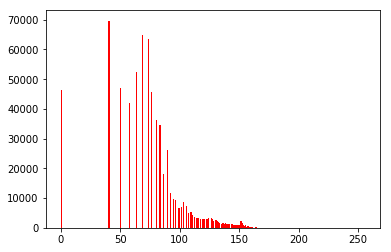

In [11]:
# histogram
img_small_brighter = cv2.resize(img_brighter, (int(img_brighter.shape[0]*0.5), int(img_brighter.shape[1]*0.5)))
plt.hist(img_brighter.flatten(), 256, [0, 256], color = 'r')
img_yuv = cv2.cvtColor(img_small_brighter, cv2.COLOR_BGR2YUV)
print(img_yuv[:,:,0])
# equalize the histogram of the Y channel
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])   # only for 1 channel
# convert the YUV image back to RGB format
print(img_yuv[:,:,0])
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)   # y: luminance(明亮度), u&v: 色度饱和度
cv2.imshow('Color input image', img_small_brighter)
cv2.imshow('Histogram equalized', img_output)
key = cv2.waitKey(0)
if key == 27:

    cv2.destroyAllWindows()


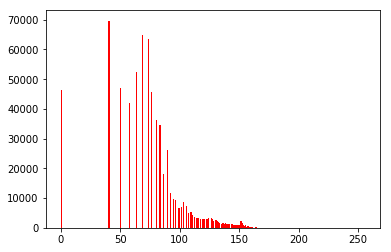

In [12]:
#首先截取一部分img_brighter图像
#用直方图表示这部分图像
#将截取部分转为yuv 即 亮度，色度， 浓度 空间
#将这部分亮度的像素直方图均衡化
#输出这两部分
small_brighter_img = cv2.resize(img_brighter, (int(img_brighter.shape[0] * 0.5), int(img_brighter.shape[1] * 0.5)))
plt.hist(img_brighter.flatten(), 256, [0, 256], color = 'r')
yuv = cv2.cvtColor(small_brighter_img, cv2.COLOR_BGR2YUV)
yuv[:,:,0] = cv2.equalizeHist(yuv[:,:,0])
yuv = cv2.cvtColor(yuv, cv2.COLOR_YUV2BGR)
cv2.imshow("small_brighter_img", small_brighter_img)
cv2.imshow("yuv_equalized", yuv)
key = cv2.waitKey(0)
if key == 27:

    cv2.destroyAllWindows()

In [13]:
# rotation
M = cv2.getRotationMatrix2D((img.shape[1] / 2, img.shape[0] / 2), 30, 1) # center, angle, scale
print(M)
img_rotate = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
cv2.imshow('rotated lenna', img_rotate)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()

print(M)


[[  0.8660254    0.5        -96.36275741]
 [ -0.5          0.8660254  168.3692934 ]]
[[  0.8660254    0.5        -96.36275741]
 [ -0.5          0.8660254  168.3692934 ]]


In [14]:
M1 = cv2.getRotationMatrix2D((img.shape[1] / 2, img.shape[0] / 2), 30, 1)
img_rotate1 = cv2.warpAffine(img, M1, (img.shape[1], img.shape[0]))
cv2.imshow("rotated", img_rotate1)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

print(M1)

[[  0.8660254    0.5        -96.36275741]
 [ -0.5          0.8660254  168.3692934 ]]


In [15]:
# scale+rotation+translation = similarity transform
M = cv2.getRotationMatrix2D((img.shape[1] / 3, img.shape[0] / 3), 0, 1) # center, angle, scale
img_rotate = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
cv2.imshow('rotated lenna', img_rotate)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()

print(M)


[[ 1.  0.  0.]
 [-0.  1.  0.]]


In [16]:
##############################
# Affine Transform
rows, cols, ch = img.shape
pts1 = np.float32([[0, 0], [cols - 1, 0], [0, rows - 1]])
pts2 = np.float32([[cols * 0.1, rows * 0.1], [cols * 0.9, rows * 0.4], [cols * 0.1, rows * 0.9]])
 
M = cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(img, M, (cols, rows))

cv2.imshow('affine lenna', dst)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()


In [17]:
rows, cols, ch = img.shape
pts1 = np.float32([[0, 0], [cols - 1, 0], [0, rows -1]])
pts2 = np.float32([[cols * 0.1, rows * 0.1], [cols * 0.9, rows * 0.4], [cols * 0.2, rows * 0.9]])
M = cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(img, M, (cols, rows))
cv2.imshow('affine lenna', dst)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()

In [18]:
############################
# perspective transform
def random_warp(img, row, col):
    height, width, channels = img.shape

    # warp:
    random_margin = 60
    x1 = random.randint(-random_margin, random_margin)
    y1 = random.randint(-random_margin, random_margin)
    x2 = random.randint(width - random_margin - 1, width - 1)
    y2 = random.randint(-random_margin, random_margin)
    x3 = random.randint(width - random_margin - 1, width - 1)
    y3 = random.randint(height - random_margin - 1, height - 1)
    x4 = random.randint(-random_margin, random_margin)
    y4 = random.randint(height - random_margin - 1, height - 1)

    dx1 = random.randint(-random_margin, random_margin)
    dy1 = random.randint(-random_margin, random_margin)
    dx2 = random.randint(width - random_margin - 1, width - 1)
    dy2 = random.randint(-random_margin, random_margin)
    dx3 = random.randint(width - random_margin - 1, width - 1)
    dy3 = random.randint(height - random_margin - 1, height - 1)
    dx4 = random.randint(-random_margin, random_margin)
    dy4 = random.randint(height - random_margin - 1, height - 1)

    pts1 = np.float32([[0, 500], [0, 10], [500, 10], [500, 500]])
    pts2 = np.float32([[0, 500], [200, 150], [400, 150], [500, 500]])
    M_warp = cv2.getPerspectiveTransform(pts1, pts2)
    img_warp = cv2.warpPerspective(img, M_warp, (width, height))
    return M_warp, img_warp
M_warp, img_warp = random_warp(img, img.shape[0], img.shape[1])
cv2.imshow('lenna_warp', img_warp)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()


In [19]:
pts1 = np.float32([[0, 500], [0, 10], [500, 10], [500, 500]])
pts2 = np.float32([[0, 500], [150, 150], [400, 150], [500, 500]]) 
M_warp = cv2.getPerspectiveTransform(pts1, pts2)
img_warp = cv2.warpPerspective(img, M_warp, (img.shape[0], img.shape[1]))
cv2.imshow('lenna_warp', img_warp)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()

In [20]:
#mix work
import cv2
import numpy as np
from matplotlib import pyplot as plt
import random

In [30]:
img = cv2.imread('D:/DEEPL/GOCV/Lesson/WEEK01/dark2.jpg')
cv2.imshow("dark", img)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

img_crop = img[300:500, 150:300,]
cv2.imshow("img_crop", img_crop)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [22]:
yuv_crop = cv2.cvtColor(img_crop, cv2.COLOR_BGR2YUV)
cv2.imshow("yuv_crop", yuv_crop)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

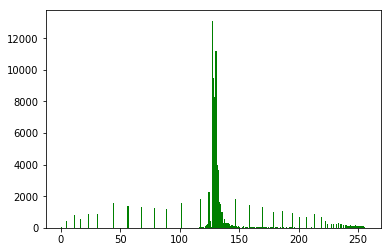

In [31]:
plt.hist(yuv_crop.flatten(), 256, (0,256), color = 'r')
yuv_crop[:,:,0] = cv2.equalizeHist(yuv_crop[:, :,0])
plt.hist(yuv_crop.flatten(), 256, (0,256), color = 'g')
cv2.imshow("yuv_crop", yuv_crop)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [32]:
def gamma_correction(img, gamma = 1.0):
    invGamma = 1.0 / gamma
    Table = []
    for i in range(256):
        Table.append(((i / 255.0) ** invGamma) * 255)
    Table = np.array(Table).astype(img.dtype)
    return cv2.LUT(img, Table)

In [33]:
img_gamma = gamma_correction(img, 2.0)
cv2.imshow("img_gamma", img_gamma)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [ ]:
img_gamma[300:500, 150:300,] = yuv_crop
cv2.imshow("img_gamma", img_gamma)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()
img_gamma = gamma_correction(img_gamma, 1.5)
cv2.imshow("img_gamma", img_gamma)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [27]:
M  = cv2.getRotationMatrix2D((img_gamma.shape[0] / 2, img_gamma.shape[1] / 2), 30, 1)
dst = cv2.warpAffine(img_gamma, M, (img_gamma.shape[0], img_gamma.shape[1]))
cv2.imshow("dst", dst)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [28]:
pts1 = np.float32([[0, 0], [img_gamma.shape[0] - 1, 0], [0, img_gamma.shape[1] - 1]])
pts2 = np.float32([[30, 30], [400, 300], [300, 400]])
M = cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(img_gamma, M, (img_gamma.shape[0], img_gamma.shape[1]))
cv2.imshow("dst", dst)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [29]:
pts1 = np.float32([[0, 500], [0, 10], [500, 10], [500, 500]])
pts2 = np.float32([[0, 500], [150, 150], [400, 150], [500, 500]]) 
M = cv2.getPerspectiveTransform(pts1, pts2)
dst = cv2.warpPerspective(img_gamma, M, (img_gamma.shape[0], img_gamma.shape[1]))
cv2.imshow("dst", dst)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()